In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

## Load the Tvar terms

In [2]:
datadir = '/g/data1/v45/pm2987/SpecTransfers_Tvar/'
dataname = '_oc_Tvar_'

w = np.load('freq_output_from_code.npy')/365
dw = w[100] - w[99]

# Full-domain ocean spectra layer 1
yrs = '34_133'
vert_adv = np.load(datadir+'vert_adv'+dataname+yrs+'.npy')
To2 = np.load(datadir+'To2'+dataname+yrs+'.npy')
ToTa = np.load(datadir+'ToTa'+dataname+yrs+'.npy')
Tum = np.load(datadir+'Tum'+dataname+yrs+'.npy')
Tvm = np.load(datadir+'Tvm'+dataname+yrs+'.npy')
Fme = np.load(datadir+'Fme'+dataname+yrs+'.npy')
slh = np.load(datadir+'slh'+dataname+yrs+'.npy')
Tdel2T = np.load(datadir+'Tdel2T'+dataname+yrs+'.npy')
Tdel4T = np.load(datadir+'Tdel4T'+dataname+yrs+'.npy')

# Define constants

In [3]:
dx = 5000. # meters
dy = 5000. # meters
#dt = 1 # in days
H = [350.0, 750.0, 2900.0]  # meters
Htot = H[0] + H[1] + H[2]
Hm = 100 # meters (mixed layer height)
f0 = 9.37456*(10**(-5)) #1/s (Coriolis parameter)
g = [.015, .0075]
delta_ek = 2. # meters
alpha_bc = 0.2 # nondimensional mixed boundary condition for OCEAN
gamma = 0.5*alpha_bc + 1 # nondimensional number for ease of calculation
rho = 1000.0 # kg/(m^3)
Cp = 4000. # specific heat of ocean in J/(kg*K)
T1 = 287
ocnorm = 1.0/(960*960) #from QGCM write-up
dt = 86400.0 # seconds in a day (time difference between each point in time)
K2 = 200 # m^2/s (called st2d in input.params)
K4 = 2e9 # m^4/s (called st4d in input.params)
tmbaro = 3.04870e2 # mean ocean mixed layer absolute temperature (K)
tmbara = 3.05522e2 # mean atmosphere mixed layer absolute temperature (K)
toc1 = -1.78699e1 # Relative temperature for ocean layer 1

mask = 2 # number of cells to mask at boundaries

# --------------------------------
# The following are radiation constants output from the model
Dmdown = -3.2342349507402
D0up = 6.4271329356690
lamda = 35.00000 # sensible/latent heat flux coefficient (W m^2/kg) 
Fs_prime = 80.0 # perturbation amplitude of incoming solar radiation (W/m^2)

# Multiply terms by the appropriate constants

In [4]:
Tum_plot = -Tum
Tvm_plot = -Tvm

vert_adv_plot = vert_adv

slh_plot = -(lamda/(rho*Cp*Hm)) * slh

oc_rh = -(D0up/(rho*Cp*Hm)) * To2

atm_rh = -(Dmdown/(rho*Cp*Hm)) * ToTa

Fme_plot = -0.5 * (1/Hm) * (Fme)

Tdel2T_plot = K2 * Tdel2T

Tdel4T_plot = - K4 * Tdel4T

sum_terms = np.sum((Tum_plot,Tvm_plot,slh_plot,oc_rh,atm_rh,vert_adv_plot,Fme_plot,Tdel2T_plot,Tdel4T_plot),axis=0)

sum_terms = np.sum((Tum_plot,Tvm_plot,slh_plot,oc_rh,atm_rh,vert_adv_plot,Fme_plot),axis=0)
print(sum_terms.shape)

(18251,)


## Function to plot lines/labels

In [5]:
def plot_lines():
    plt.axhline(0,color='k',linestyle='dotted')
    plt.axvline((1./20),color='k',linestyle='dotted')
    plt.axvline((1./30),color='k',linestyle='dotted')
    plt.axvline((1./50),color='k',linestyle='dotted')
    plt.axvline((1./(365)),color='k',linestyle='dotted')
    plt.axvline((1./(10*365)),color='k',linestyle='dotted')
    plt.axvline((1./(17*365)),color='k',linestyle='dotted')
    plt.axvline((1./(34*365)),color='k',linestyle='dotted')
    plt.text(1./(20+3),vtext_loc,'20 days',rotation=90,fontsize=20)
    plt.text(1./(30+5),vtext_loc,'30 days',rotation=90,fontsize=20)
    plt.text(1./(50+10),vtext_loc,'50 days',rotation=90,fontsize=20)
    plt.text(1./(430),vtext_loc,'1 year',rotation=90,fontsize=20)
    plt.text(1./(10*365+600),vtext_loc,'10 years',rotation=90,fontsize=20)
    plt.text(1./(17*365+1000),vtext_loc,'17 years',rotation=90,fontsize=20)
    plt.text(1./(34*365+2200),vtext_loc,'34 years',rotation=90,fontsize=20)
    
    plt.axhline(0,color='k',linestyle='dotted')
    plt.legend(fontsize=18,loc='lower right')
    plt.xlabel('Frequency (cycles/day)',fontsize=22)
    plt.ylabel('(K$^2$/s)/(cycles/day)',fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title('Ocean Spectral temperature variance terms',fontsize=30)
    plt.xlim(w[0],w[-1])

## Plot the Tvar terms

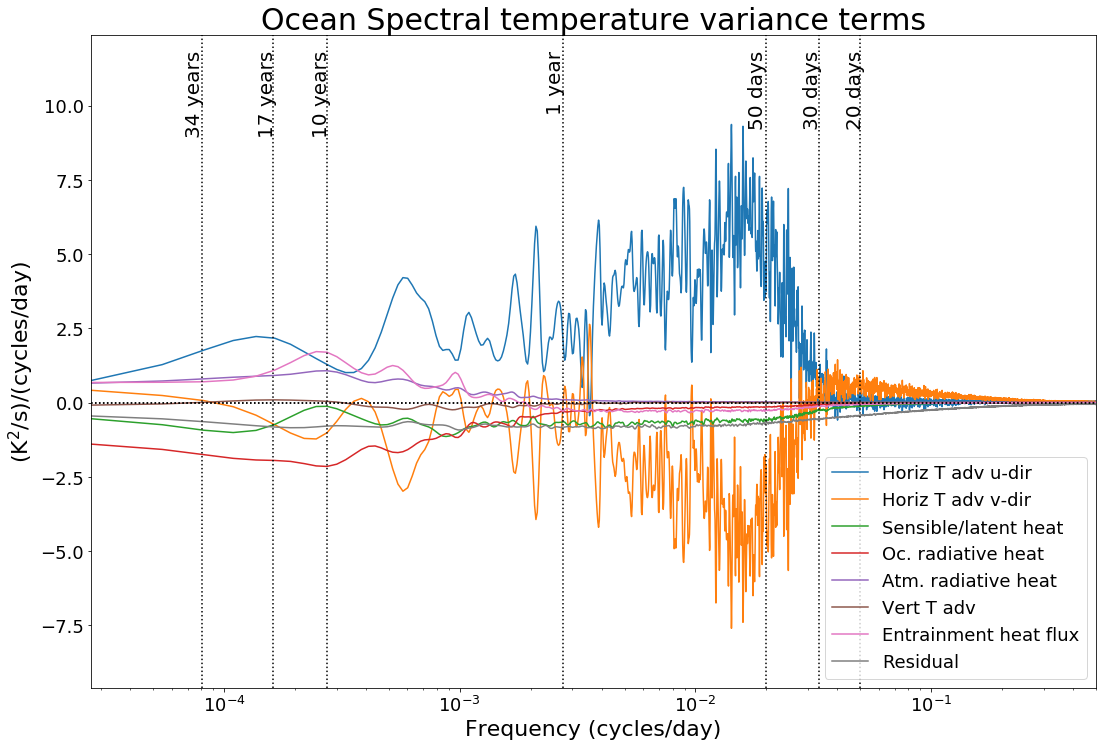

In [9]:
n = 2
if n:
    n_savename = '_gaussSmooth'+str(n)
    vtext_loc = np.max(gaussian_filter(Tum_plot/dw,sigma=n))+2
else:
    n_savename = ''
    vtext_loc = np.max(gaussian_filter(Tum_plot/dw,sigma=n)) # for no smoothing

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter(Tum_plot/dw,sigma=n),label='Horiz T adv u-dir')
plt.semilogx(w,gaussian_filter(Tvm_plot/dw,sigma=n),label='Horiz T adv v-dir')
plt.semilogx(w,gaussian_filter(slh_plot/dw,sigma=n),label='Sensible/latent heat')
plt.semilogx(w,gaussian_filter(oc_rh/dw,sigma=n),label='Oc. radiative heat')
plt.semilogx(w,gaussian_filter(atm_rh/dw,sigma=n),label='Atm. radiative heat')
plt.semilogx(w,gaussian_filter(vert_adv_plot/dw,sigma=n),label='Vert T adv')
plt.semilogx(w,gaussian_filter(Fme_plot/dw,sigma=n),label='Entrainment heat flux')
#plt.semilogx(w,gaussian_filter(Tdel2T_plot/dw,sigma=n),label='T Diffusion 2nd order')
#plt.semilogx(w,gaussian_filter(Tdel4T_plot/dw,sigma=n),label='T Diffusion 4th order')
plt.semilogx(w,gaussian_filter(-sum_terms/dw,sigma=n),label='Residual')

plt.ylim(np.min(gaussian_filter(Tvm_plot/dw,sigma=n)-2),np.max(gaussian_filter(Tum_plot/dw,sigma=n))+3)
#plt.ylim(np.min(gaussian_filter(Tdel2T_plot/dw,sigma=n)-3),np.max(gaussian_filter(Tum_plot/dw,sigma=n))+1) # for no smoothing

plot_lines()


#plt.savefig('Spec_Tvar_100yrs_034_133'+n_savename+'.png')

# Sum over certain terms

### Sum over diffusion terms and over horizontal advection terms

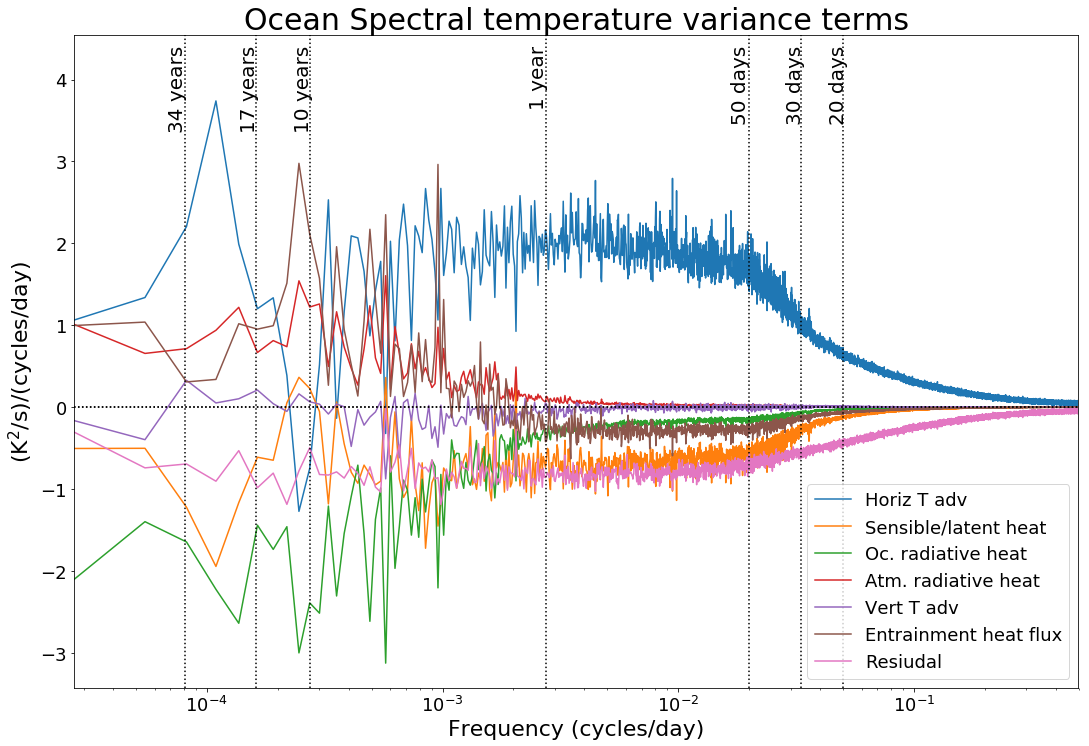

In [10]:
n = 0
if n:
    n_savename = '_gaussSmooth'+str(n)
    
else:
    n_savename = ''
vtext_loc = np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.5

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n),label='Horiz T adv')
plt.semilogx(w,gaussian_filter(slh_plot/dw,sigma=n),label='Sensible/latent heat')
plt.semilogx(w,gaussian_filter(oc_rh/dw,sigma=n),label='Oc. radiative heat')
plt.semilogx(w,gaussian_filter(atm_rh/dw,sigma=n),label='Atm. radiative heat')
plt.semilogx(w,gaussian_filter(vert_adv_plot/dw,sigma=n),label='Vert T adv')
plt.semilogx(w,gaussian_filter(Fme_plot/dw,sigma=n),label='Entrainment heat flux')
#plt.semilogx(w,gaussian_filter((Tdel2T_plot+Tdel4T_plot)/dw,sigma=n),label='T Diffusion')
plt.semilogx(w,gaussian_filter(-sum_terms/dw,sigma=n),label='Resiudal')

#plt.ylim(np.min(gaussian_filter((Tdel2T_plot+Tdel4T_plot)/dw,sigma=n)-0.3),np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.8)
plt.ylim(np.min(gaussian_filter((oc_rh)/dw,sigma=n)-0.3),np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.8)


plot_lines()

#plt.savefig('Spec_Tvar_100yrs_034_133_sumHorizAdv_sumDiffusion'+n_savename+'.png')

## Sum over all heat flux terms

### With Gaussian smoothing

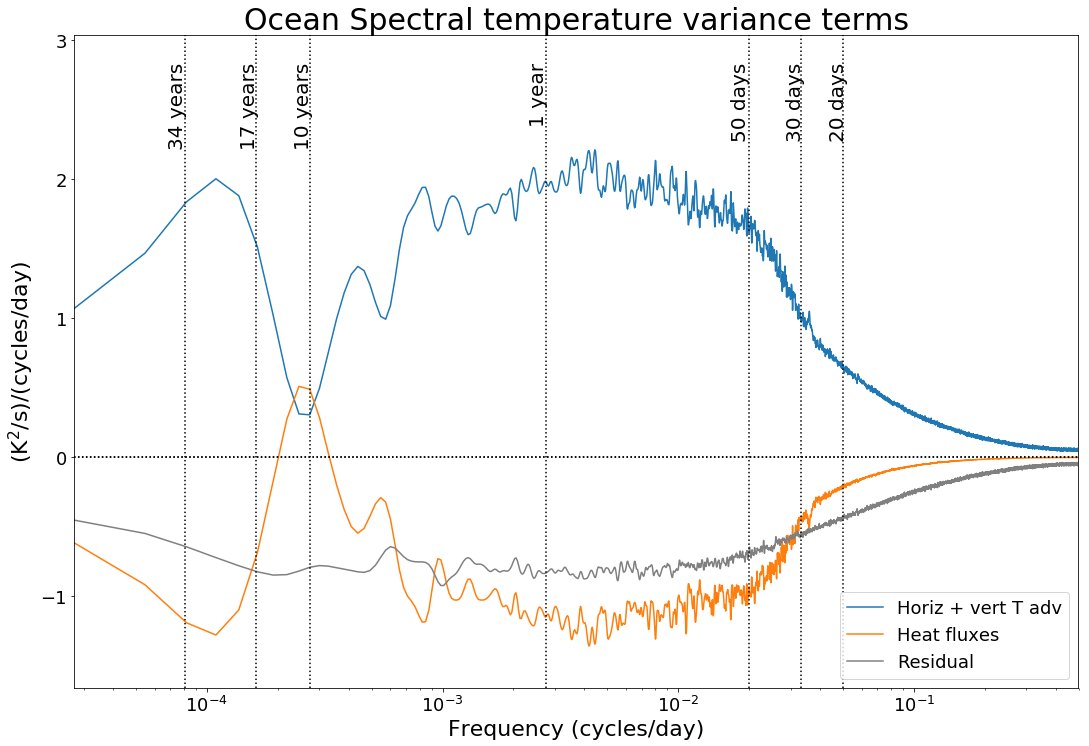

In [13]:
n = 2
if n:
    n_savename = '_gaussSmooth'+str(n)
else:
    n_savename = ''
    
vtext_loc = np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.5

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((Tum_plot+Tvm_plot+vert_adv_plot)/dw,sigma=n),label='Horiz + vert T adv')
plt.semilogx(w,gaussian_filter((slh_plot+oc_rh+atm_rh+Fme_plot)/dw,sigma=n),label='Heat fluxes')
#plt.semilogx(w,gaussian_filter((Tdel2T_plot+Tdel4T_plot)/dw,sigma=n),label='Horiz T Diffusion')
plt.semilogx(w,gaussian_filter(-sum_terms/dw,sigma=n),color='grey',label='Residual')

#plt.ylim(np.min(gaussian_filter((Tdel2T_plot+Tdel4T_plot)/dw,sigma=n)-0.3),np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.8)
plt.ylim(np.min(gaussian_filter((slh_plot+oc_rh+atm_rh+Fme_plot)/dw,sigma=n)-0.3),np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.8)


plot_lines()

#plt.savefig('Spec_Tvar_100yrs_034_133_Tadv_vs_heatFlux_vs_diffusion'+n_savename+'.png')

# Same as above but separating horizontal from vertical advection (Ekman term)

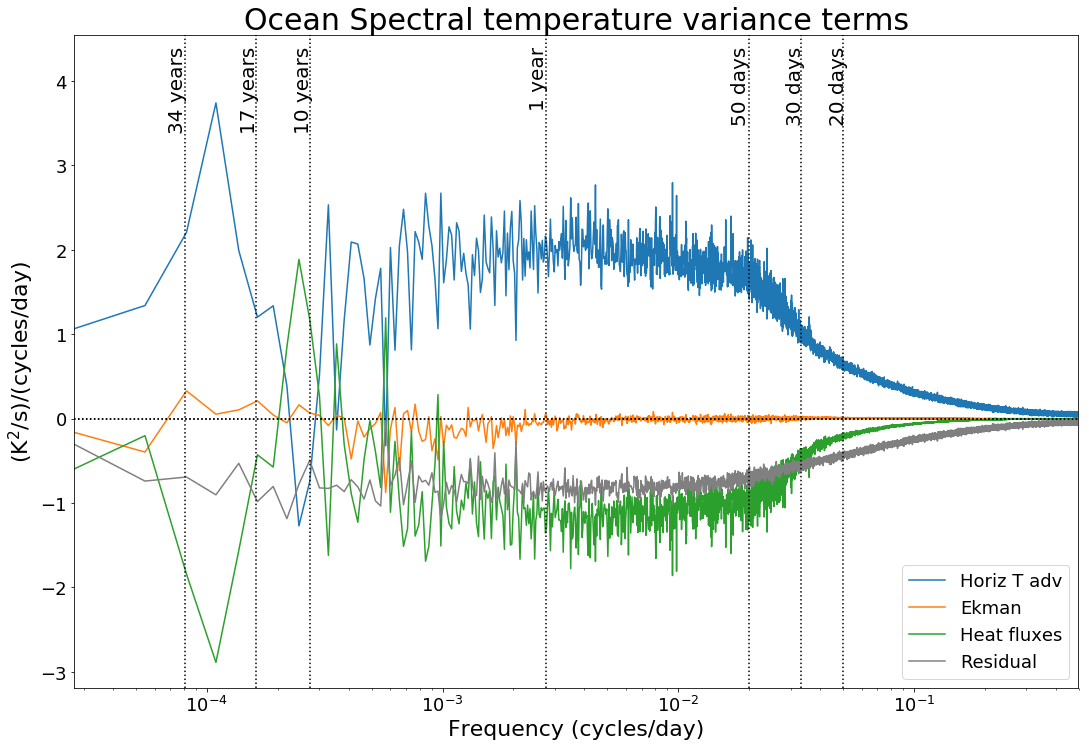

In [14]:
n = 0
if n:
    n_savename = '_gaussSmooth'+str(n)
else:
    n_savename = ''
    
vtext_loc = np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.5

plt.figure(figsize=(18,12))
plt.semilogx(w,gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n),label='Horiz T adv')
plt.semilogx(w,gaussian_filter((vert_adv_plot)/dw,sigma=n),label='Ekman')
plt.semilogx(w,gaussian_filter((slh_plot+oc_rh+atm_rh+Fme_plot)/dw,sigma=n),label='Heat fluxes')
#plt.semilogx(w,gaussian_filter((Tdel2T_plot+Tdel4T_plot)/dw,sigma=n),label='Horiz T Diffusion')
plt.semilogx(w,gaussian_filter(-sum_terms/dw,sigma=n),color='grey',label='Residual')

#plt.ylim(np.min(gaussian_filter((Tdel2T_plot+Tdel4T_plot)/dw,sigma=n)-0.3),np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.8)
plt.ylim(np.min(gaussian_filter((slh_plot+oc_rh+atm_rh+Fme_plot)/dw,sigma=n)-0.3),np.max(gaussian_filter((Tum_plot+Tvm_plot)/dw,sigma=n))+0.8)

plot_lines()

#plt.savefig('Spec_Tvar_100yrs_034_133_ThorizAdv_vs_heatFlux_vs_Ekman_vs_diffusion'+n_savename+'.png')